# Using the statistics module in PyPSA

The `statistics` module is used to easily extract information from your networks. This is useful when inspecting your solved networks and creating first visualizations of your results.

With the `statistics` module, you can look at different metrics of your network. A list of the implemented metrics are:
    
- Capital expenditure
- Operational expenditure
- Installed capacities
- Optimal capacities
- Supply
- Withdrawal
- Curtailment
- Capacity Factor
- Revenue
- Market value
- Energy balance

Now lets look at an example.

In [91]:
import pypsa
import matplotlib.pyplot as plt
import numpy as np

First, we open an example network we want to investigate.

In [2]:
n = pypsa.examples.scigrid_de()

INFO:pypsa.io:Imported network scigrid-de.nc has buses, generators, lines, loads, storage_units, transformers


Lets run an overview of all statistics by calling:

In [98]:
n.statistics().dropna()

Capacity Factor  Capital Expenditure  \
            carrier                                               
Generator   Brown Coal            0.085529                  0.0   
            Gas                   0.000138                  0.0   
            Hard Coal             0.017343                  0.0   
            Nuclear               0.108665                  0.0   
            Other                 0.004624                  0.0   
            Run of River          0.142983                  0.0   
            Storage Hydro         0.103230                  0.0   
            Waste                 0.120501                  0.0   
            Wind Offshore         0.089504                  0.0   
            Wind Onshore          0.092218                  0.0   
StorageUnit Pumped Hydro          0.004625                  0.0   

                             Curtailment      Dispatch  Installed Capacity  \
            carrier                                                          
Generator   Brown Coal          0.000000  42859.029000        20879.500000   
            Gas                 0.000000     79.437970        23913.130000   
            Hard Coal           0.000000  10535.663500        25312.600000   
            Nuclear             0.000000  31472.994000        12068.000000   
            Other               0.000000    336.000000         3027.800000   
            Run of River        0.000000  13723.318200         3999.100000   
            Storage Hydro       0.000000   3580.000000         1445.000000   
            Waste               0.000000   4760.000000         1645.900000   
            Wind Offshore   63086.266344   6387.383000         2973.500000   
            Wind Onshore   390798.156206  82642.127289        37339.895329   
StorageUnit Pumped Hydro        0.000000  -1018.866300         9179.500000   

                           Market Value  Operational Expenditure  \
            carrier                                                
Generator   Brown Coal        13.725614              428590.2900   
            Gas               50.000000                3971.8985   
            Hard Coal         25.833395              263391.5875   
            Nuclear           16.747951              251783.9520   
            Other             34.235750               10752.0000   
            Run of River      21.992657               41169.9546   
            Storage Hydro     20.364349               10740.0000   
            Waste             20.508790               28560.0000   
            Wind Offshore      2.197173                   0.0000   
            Wind Onshore       4.913119                   0.0000   
StorageUnit Pumped Hydro      -3.938994                   0.0000   

                           Optimal Capacity        Revenue        Supply  \
            carrier                                                        
Generator   Brown Coal         20879.500000  588266.476000  42859.029000   
            Gas                23913.130000    3971.898500     79.437970   
            Hard Coal          25312.600000  272171.958470  10535.663500   
            Nuclear            12068.000000  527108.168310  31472.994000   
            Other               3027.800000   11503.212000    336.000000   
            Run of River        3999.100000  301812.224107  13723.318200   
            Storage Hydro       1445.000000   72904.370250   3580.000000   
            Waste               1645.900000   97621.842763   4760.000000   
            Wind Offshore       2973.500000   14034.188115   6387.383000   
            Wind Onshore       37339.895329  406030.614531  82642.127289   
StorageUnit Pumped Hydro        9179.500000    4013.308116      0.000000   

                           Withdrawal  
            carrier                    
Generator   Brown Coal         0.0000  
            Gas                0.0000  
            Hard Coal          0.0000  
            Nuclear            0.0000  
            Other         

So far the `statistics` are not so interesting, because we have not solved the network yet. We can only see that the network already has some installed capacities for different components.

You can see that `statistics` returns a `pandas.DataFrame`. The MultiIndex of the `DataFrame` provides the name of the network component (i.e. first entry of the MultiIndex, like *Generator, Line,...*) on the first index level. The `carrier` index level provides the carrier name of the given component. For example, in `n.generators`, we have the carriers *Brown Coal, Gas* and so on.

Now lets solve the network.

In [4]:
n.optimize(n.snapshots[:4])

Index(['2', '5', '10', '12', '13', '15', '18', '20', '22', '24', '26', '30',
       '32', '37', '42', '46', '52', '56', '61', '68', '69', '74', '78', '86',
       '87', '94', '95', '96', '99', '100', '104', '105', '106', '107', '117',
       '120', '123', '124', '125', '128', '129', '138', '143', '156', '157',
       '159', '160', '165', '184', '191', '195', '201', '220', '231', '232',
       '233', '236', '247', '248', '250', '251', '252', '261', '263', '264',
       '267', '272', '279', '281', '282', '292', '303', '307', '308', '312',
       '315', '317', '322', '332', '334', '336', '338', '351', '353', '360',
       '362', '382', '384', '385', '391', '403', '404', '413', '421', '450',
       '458'],
      dtype='object', name='Transformer')
Index(['2', '5', '10', '12', '13', '15', '18', '20', '22', '24', '26', '30',
       '32', '37', '42', '46', '52', '56', '61', '68', '69', '74', '78', '86',
       '87', '94', '95', '96', '99', '100', '104', '105', '106', '107', '117',
       '120

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp /tmp/linopy-problem-el37b9_q.lp --output /tmp/linopy-solve-h5y6xur0.sol
Reading problem data from '/tmp/linopy-problem-el37b9_q.lp'...
23828 rows, 9940 columns, 43938 non-zeros
127276 lines were read
GLPK Simplex Optimizer 5.0
23828 rows, 9940 columns, 43938 non-zeros
Preprocessing...
3772 rows, 5708 columns, 19650 non-zeros
Scaling...
 A: min|aij| =  1.485e-02  max|aij| =  1.974e+02  ratio =  1.329e+04
GM: min|aij| =  1.913e-01  max|aij| =  5.228e+00  ratio =  2.733e+01
EQ: min|aij| =  3.688e-02  max|aij| =  1.000e+00  ratio =  2.712e+01
Constructing initial basis...
Size of triangular part is 3665
      0: obj =   6.144485279e+07 inf =   5.153e+07 (2847)
   6813: obj =   4.807086401e+06 inf =   7.457e-13 (0) 41


INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 9940 primals, 23828 duals
Objective: 1.04e+06
Solver model: not available
Solver message: optimal



*  9356: obj =   1.038959807e+06 inf =   4.098e-12 (0) 10
OPTIMAL LP SOLUTION FOUND
Time used:   1.9 secs
Memory used: 17.3 Mb (18143476 bytes)
Writing basic solution to '/tmp/linopy-solve-h5y6xur0.sol'...


INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Transformer-fix-s-lower, Transformer-fix-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, Kirchhoff-Voltage-Law, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

Now we can look at the `statistics` of the solved network.

In [5]:
n.statistics().round(1)

Capacity Factor  Capital Expenditure  Curtailment  \
            carrier                                                            
Generator   Brown Coal                 0.1                  0.0          0.0   
            Gas                        0.0                  0.0          0.0   
            Geothermal                 0.0                  0.0          0.0   
            Hard Coal                  0.0                  0.0          0.0   
            Multiple                   0.0                  0.0          0.0   
            Nuclear                    0.1                  0.0          0.0   
            Oil                        0.0                  0.0          0.0   
            Other                      0.0                  0.0          0.0   
            Run of River               0.1                  0.0          0.0   
            Solar                      0.0                  0.0      47391.0   
            Storage Hydro              0.1                  0.0          0.0   
            Waste                      0.1                  0.0          0.0   
            Wind Offshore              0.1                  0.0      63086.3   
            Wind Onshore               0.1                  0.0     390798.2   
Line        AC                         0.0                  0.0          NaN   
Load        -                          NaN                  NaN          NaN   
StorageUnit Pumped Hydro               0.0                  0.0          0.0   
Transformer -                          0.0                  0.0          NaN   

                           Dispatch  Installed Capacity  Market Value  \
            carrier                                                     
Generator   Brown Coal      42859.0             20879.5          13.7   
            Gas                79.4             23913.1          50.0   
            Geothermal          0.0                31.7           NaN   
            Hard Coal       10535.7             25312.6          25.8   
            Multiple            0.0               152.7           NaN   
            Nuclear         31473.0             12068.0          16.7   
            Oil                 0.0              2710.2           NaN   
            Other             336.0              3027.8          34.2   
            Run of River    13723.3              3999.1          22.0   
            Solar               0.0             37041.5           NaN   
            Storage Hydro    3580.0              1445.0          20.4   
            Waste            4760.0              1645.9          20.5   
            Wind Offshore    6387.4              2973.5           2.2   
            Wind Onshore    82642.1             37339.9           4.9   
Line        AC              17195.2            961101.1          60.8   
Load        -             -195357.1                 NaN         -17.4   
StorageUnit Pumped Hydro    -1018.9              9179.5          -3.9   
Transformer -              -13993.7            192000.0          -3.7   

                           Operational Expenditure  Optimal Capacity  \
            carrier                                                    
Generator   Brown Coal                    428590.3           20879.5   
            Gas                             3971.9           23913.1   
            Geothermal                         0.0              31.7   
            Hard Coal                     263391.6           25312.6   
            Multiple                           0.0             152.7   
            Nuclear                       251784.0           12068.0   
            Oil                                0.0            2710.2   
            Other                          10752.0            3027.8   
            Run of River                   41170.0            3999.1   
            Solar                              0.0           37041.5   
            Storage Hydro                  10740.0            1445.0   
            Waste            

As you can see there is now much more information available. There are still no capital expenditures in the network, because we only performed an operational optimization with this example network.

If you are interested in a specific metric, e.g. curtailment, you can run

In [99]:
curtailment = n.statistics.curtailment()
curtailment[curtailment!=0]

           carrier      
Generator  Solar             47391.043207
           Wind Offshore     63086.266344
           Wind Onshore     390798.156206
dtype: float64

Note that when calling a specific metric the `statistics` module returns a `pandas.Series`.
To find the unit of the data returned by `statistics`, you can call `attrs` on the `DataFrame` or `Series`.

In [7]:
curtailment.attrs

{'name': 'Curtailment', 'unit': 'MWh'}

So the unit of curtailment is given in `MWh`. You can also customize your request.

For this you have various options:
1. You can select the component from which you want to get the metric with the attribute `comps`. Careful, `comps` has to be a list of strings.

In [102]:
n.statistics.supply(comps=["Generator"])

           carrier      
Generator  Brown Coal       42859.029000
           Gas                 79.437970
           Geothermal           0.000000
           Hard Coal        10535.663500
           Multiple             0.000000
           Nuclear          31472.994000
           Oil                  0.000000
           Other              336.000000
           Run of River     13723.318200
           Solar                0.000000
           Storage Hydro     3580.000000
           Waste             4760.000000
           Wind Offshore     6387.383000
           Wind Onshore     82642.127289
Name: generators, dtype: float64

2. For metrics which have a time dimension, you can choose the aggregation method or decide to not aggregate them at all. Just use the `aggregate_time` attribute to specify what you want to do.

For example calculate the mean supply/generation per time step is

In [103]:
n.statistics.supply(comps=["Generator"], aggregate_time="mean")

           carrier      
Generator  Brown Coal       1785.792875
           Gas                 3.309915
           Geothermal          0.000000
           Hard Coal         438.985979
           Multiple            0.000000
           Nuclear          1311.374750
           Oil                 0.000000
           Other              14.000000
           Run of River      571.804925
           Solar               0.000000
           Storage Hydro     149.166667
           Waste             198.333333
           Wind Offshore     266.140958
           Wind Onshore     3443.421970
dtype: float64

Or retrieve the supply time series by not aggregating the time series. 

In [104]:
n.statistics.supply(comps=["Generator"], aggregate_time=False).iloc[:, :4]

snapshot                 2011-01-01 00:00:00  2011-01-01 01:00:00  \
          carrier                                                   
Generator Brown Coal            12563.897000         10848.560000   
          Gas                      35.826800            23.721700   
          Geothermal                0.000000             0.000000   
          Hard Coal              4778.482000          3124.547000   
          Multiple                  0.000000             0.000000   
          Nuclear                7842.041000          7863.186000   
          Oil                       0.000000             0.000000   
          Other                    84.000000            84.000000   
          Run of River           3458.909000          3419.332800   
          Solar                     0.000000             0.000000   
          Storage Hydro           895.000000           895.000000   
          Waste                  1167.500000          1240.500000   
          Wind Offshore          2489.407000           951.186000   
          Wind Onshore          18800.568772         21313.374768   

snapshot                 2011-01-01 02:00:00  2011-01-01 03:00:00  
          carrier                                                  
Generator Brown Coal            10006.395000           9440.17700  
          Gas                      13.083000              6.80647  
          Geothermal                0.000000              0.00000  
          Hard Coal              1722.869000            909.76550  
          Multiple                  0.000000              0.00000  
          Nuclear                7882.532000           7885.23500  
          Oil                       0.000000              0.00000  
          Other                    84.000000             84.00000  
          Run of River           3413.465800           3431.61060  
          Solar                     0.000000              0.00000  
          Storage Hydro           895.000000            895.00000  
          Waste                  1184.500000           1167.50000  
          Wind Offshore          1580.327000           1366.46300  
          Wind Onshore          21039.168909          21489.01484

3. You can choose how you want to group the components of the network and how to aggregate the groups. By default the components are grouped by their carriers and summed. However, you can change this by providing different `groupby` and `aggregate_groups` attributes.

In [105]:
n.statistics.supply(comps=["Generator"], groupby=["bus"], aggregate_groups="max")

           bus      
Generator  1               0.000000
           100_220kV       0.000000
           101          1392.589000
           102           970.750000
           103             0.127076
                           ...     
           95_220kV      186.429300
           96_220kV       53.032800
           97              0.002514
           98            335.603700
           99_220kV        0.000000
Name: generators, Length: 489, dtype: float64

Now you obtained the maximal supply in one time step for every bus in the network.

Often it is better when inspecting your network to visualize the tables. Therefore, you can easily make plots to analyze your results. For example the supply of the generators.

<Axes: title={'center': 'Generator in GWh'}, xlabel='carrier'>

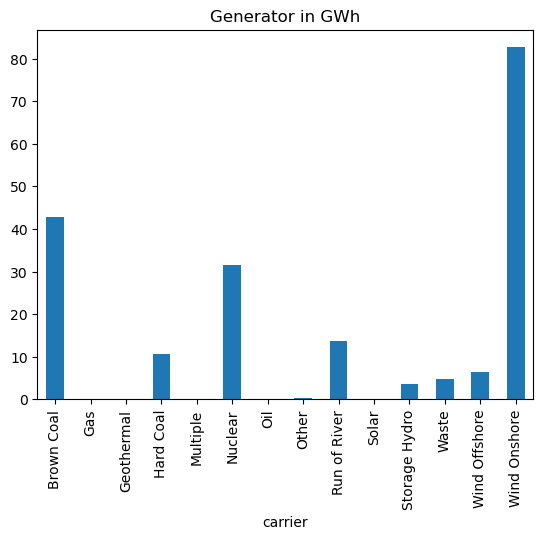

In [106]:
n.statistics.supply(comps=["Generator"]).droplevel(0).div(1e3).plot.bar(title="Generator in GWh")

Or you could plot the generation time series of the generators.

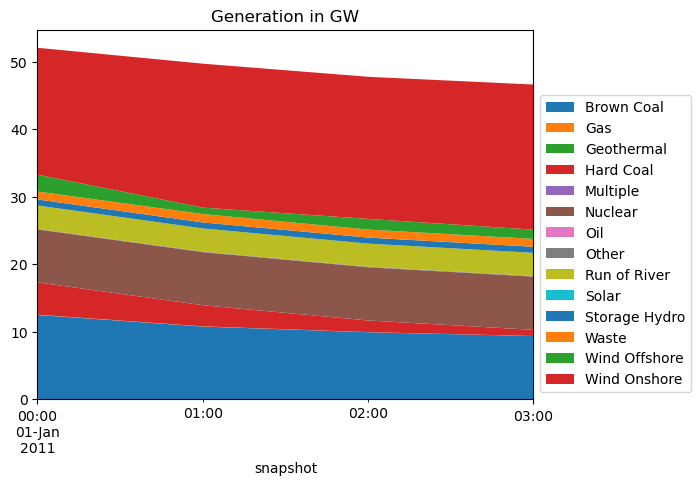

In [31]:
fig, ax = plt.subplots()
n.statistics.supply(comps=["Generator"], aggregate_time=False).droplevel(0).iloc[:, :4].div(
    1e3
).T.plot.area(
    title="Generation in GW",
    ax=ax,
    legend=False,
    linewidth=0,
)
ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)

Finally, we want to look at the energy balance of the network. The energy balance is not included in the overview of the statistics module. To calculate the energy balance, you can do

In [14]:
n.statistics.energy_balance()

             carrier        bus_carrier
Generator    Brown Coal     AC             4.285903e+04
             Gas            AC             7.943797e+01
             Geothermal     AC             0.000000e+00
             Hard Coal      AC             1.053566e+04
             Multiple       AC             0.000000e+00
             Nuclear        AC             3.147299e+04
             Oil            AC             0.000000e+00
             Other          AC             3.360000e+02
             Run of River   AC             1.372332e+04
             Solar          AC             0.000000e+00
             Storage Hydro  AC             3.580000e+03
             Waste          AC             4.760000e+03
             Wind Offshore  AC             6.387383e+03
             Wind Onshore   AC             8.264213e+04
Transformer  -              AC            -5.684342e-13
StorageUnit  Pumped Hydro   AC            -1.018866e+03
Load         -              AC            -1.953571e+05
Line    

Note that there is now an additional index level called bus carrier. This is because an energy balance is defined for every bus carrier. The bus carriers you have in your network you can find by looking at `n.buses.carrier.unique()`. For this network, there is only one bus carrier which is AC and corresponds to electricity. However, you can have further bus carriers for example when you have a sector coupled network. You could have heat or CO $_2$ as bus carrier. Therefore, for many `statistics` functions you have to be careful about the units of the values and it is not always given by the `attr` object of the `DataFrame` or `Series`.

Finally, we want to plot the energy balance and the energy balance time series for electrcity which has the bus carrier AC. In a sector coupled network, you could also choose other bus carriers like H2 or heat. Note that in this example "-" represents the load in the system.

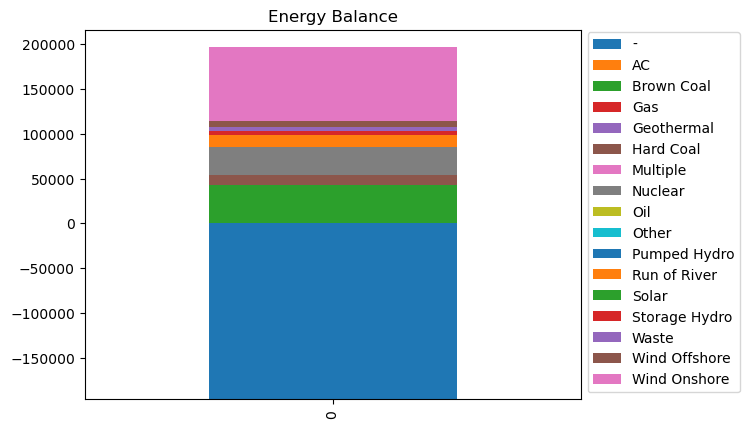

In [33]:
fig, ax = plt.subplots()
n.statistics.energy_balance().loc[:,:,"AC"].groupby("carrier").sum().to_frame().T.plot.bar(stacked=True, ax=ax,     title="Energy Balance")
ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)

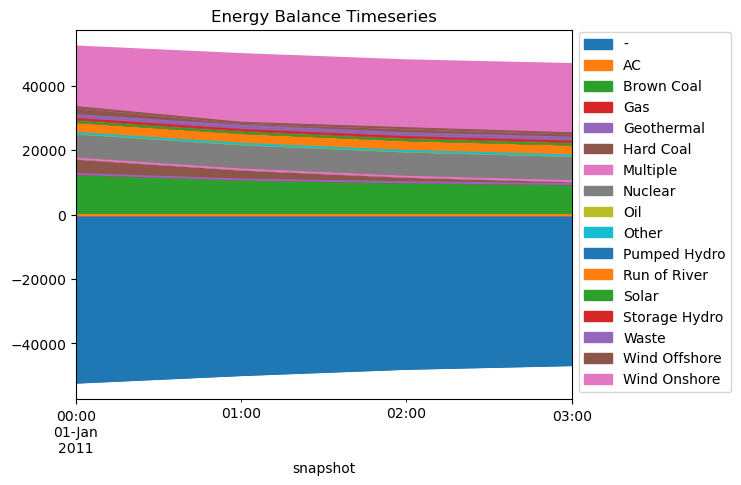

In [107]:
fig, ax = plt.subplots()
n.statistics.energy_balance(aggregate_time=False).loc[:,:,"AC"].droplevel(0).iloc[:,:4].groupby("carrier").sum().where(lambda x: np.abs(x)>1).fillna(0).T.plot.area(ax=ax, title="Energy Balance Timeseries")
ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)